# TERRA-REF Image Stitching

In [10]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
from IPython.display import display
%matplotlib inline

## Display first 10 scanned images from RGB stereo camera

Note that source images are georeferenced GeoTIFFs, JPEGs are used here for illustration only.  Images are displayed in timestamp order, but scan is from south-east corner of field.

In [12]:
images = []
files = []
for img_path in sorted(glob.glob('small/2017-05-29/*/*_left.jpg')):
    files.append(img_path)
    images.append(mpimg.imread(img_path))

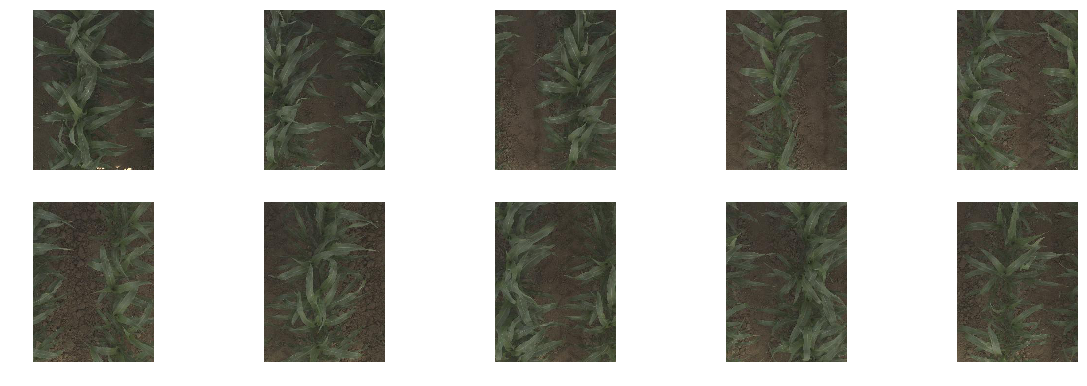

In [13]:
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.axis("off")
    plt.imshow(image)

## Use GDAL to build VRT then translate to merged GeoTIFF

In [6]:
! gdalbuildvrt  -srcnodata "-99 -99 -99" -overwrite -input_file_list input_list_small_head.txt output_small_head.vrt

0...10...20...30...40...50...60...70...80...90...100 - done.


In [7]:
! gdal_translate --config GDAL_CACHEMAX 999 output_small_head.vrt small_head.tif

Input file size is 14512, 3314
0...10...20...30...40...50...60...70...80...90...100 - done.


## Convert to JPEG for display in Jupyter

In [8]:
! gdal_translate -outsize 50% 50% -of JPEG small_head.tif small_head.jpg

Input file size is 14512, 3314
0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
### Display the final stitched image

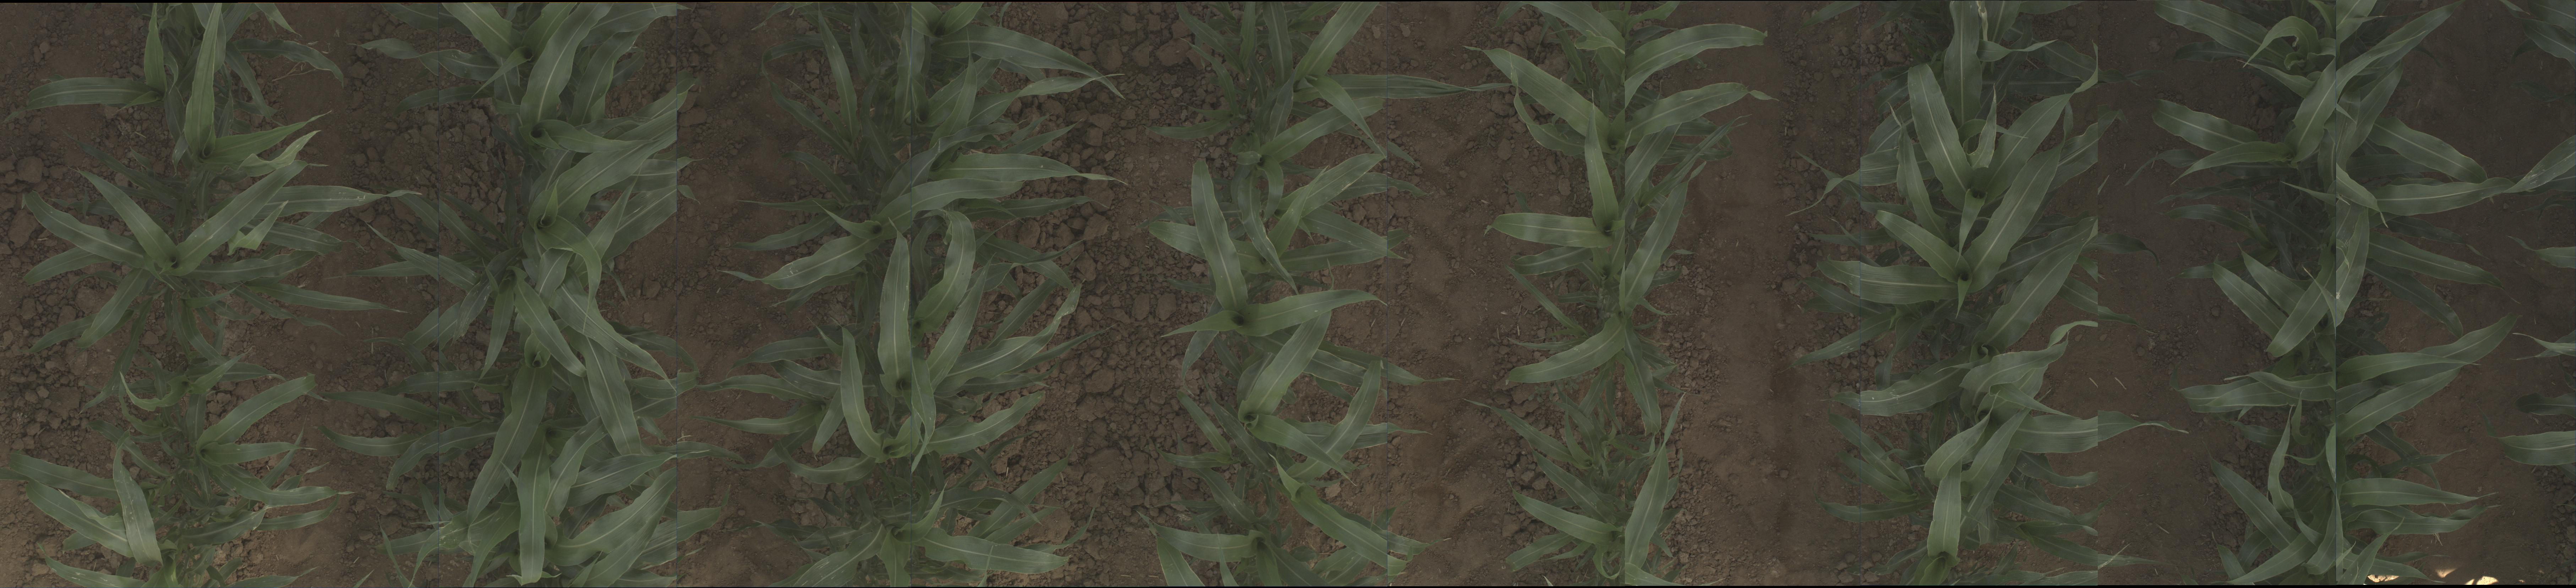

In [9]:
Image("small_head.jpg") 

## Running on HPC

The above example demonstrates how to stitch 10 images in a constrained Jupyter environment. A single day of TERRA-REF stereo RGB data contains over 8,000 images.  What if we want to stitch the full field image for a week or a month?

The TERRA-REF data is available on the ROGER HPC system at NCSA.